In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/db'
!ls

/content/drive/My Drive/Colab Notebooks/db
'Copia de london_merged.csv'   poblacion.csv   test.parquet   text.csv
 covid_19_data_.csv	       test.hdf        test.pkl
 Meteorite_Landings.csv        test.json       test.xlsx


In [3]:
import pandas as pd
import numpy as np
import datetime

pd.__version__

'1.0.5'

In [4]:
df = pd.read_csv('covid_19_data_.csv')
df.sample(10)
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

In [5]:
list(df)

['SNo',
 'ObservationDate',
 'Province/State',
 'Country/Region',
 'Last Update',
 'Confirmed',
 'Deaths',
 'Recovered']

In [6]:
# Eliminamos las columnas no necesarias 
df = df[[
 'ObservationDate',
 'Country/Region',
 'Confirmed',
 'Deaths',
 'Recovered']]

df

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,Mainland China,1.0,0.0,0.0
1,2020-01-22,Mainland China,14.0,0.0,0.0
2,2020-01-22,Mainland China,6.0,0.0,0.0
3,2020-01-22,Mainland China,1.0,0.0,0.0
4,2020-01-22,Mainland China,0.0,0.0,0.0
...,...,...,...,...,...
3390,2020-03-04,Ukraine,1.0,0.0,0.0
3391,2020-03-04,Australia,0.0,0.0,0.0
3392,2020-03-04,US,0.0,0.0,0.0
3393,2020-03-04,US,0.0,0.0,0.0


In [7]:
df_time = df.groupby('ObservationDate').sum()
df_time.head(5)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [8]:
df1 = df_time['Confirmed'].iloc[10:15]
df1

ObservationDate
2020-02-01    12038.0
2020-02-02    16787.0
2020-02-03    19881.0
2020-02-04    23892.0
2020-02-05    27636.0
Name: Confirmed, dtype: float64

In [9]:
df2 = df_time['Deaths'].iloc[12:17]
df2

ObservationDate
2020-02-03    426.0
2020-02-04    492.0
2020-02-05    564.0
2020-02-06    634.0
2020-02-07    719.0
Name: Deaths, dtype: float64

In [10]:
# Vemos las diferencias entre ambos, tenemos NaN donde no comparten indices
df1 - df2

ObservationDate
2020-02-01        NaN
2020-02-02        NaN
2020-02-03    19455.0
2020-02-04    23400.0
2020-02-05    27072.0
2020-02-06        NaN
2020-02-07        NaN
dtype: float64

In [11]:
df_time.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-02-29,86013.0,2941.0,39782.0
2020-03-01,88371.0,2996.0,42716.0
2020-03-02,90309.0,3085.0,45602.0
2020-03-03,92844.0,3160.0,48229.0
2020-03-04,95124.0,3254.0,51171.0


In [78]:
# diff() resta cada dia con el dia previo
df_time.diff().head()

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             NaN     NaN        NaN
Afghanistan    2020-02-24             0.0     0.0        0.0
               2020-02-25             0.0     0.0        0.0
               2020-02-26             0.0     0.0        0.0
               2020-02-27             0.0     0.0        0.0

In [13]:
df_time.diff().mean()

Confirmed    2251.642857
Deaths         77.071429
Recovered    1217.690476
dtype: float64

In [14]:
df_dift = df_time.diff()

In [15]:
df_time.head(1).to_dict()

{'Confirmed': {Timestamp('2020-01-22 00:00:00'): 555.0},
 'Deaths': {Timestamp('2020-01-22 00:00:00'): 17.0},
 'Recovered': {Timestamp('2020-01-22 00:00:00'): 28.0}}

In [16]:
df_diff = df_dift.fillna({'Confirmed': 555.0,
 'Deaths': 17.0,
 'Recovered': 28.0}
)

In [17]:
df_diff.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


In [18]:
# Recuperamos el df original usando una suma acumulativa
df_diff.cumsum().head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [19]:
# funcion resample aplicado a 
# 7 dias = 7D
# Mensual = M
df_diff.resample('M').sum()
# permite usar otras funciones aplicado a nuestra serie de tiempo

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9925.0,213.0,222.0
2020-02-29,76088.0,2728.0,39560.0
2020-03-31,9111.0,313.0,11389.0


In [20]:
# Por que mas casos en febrero, tenemos mas muestras, lo observamos aqui
df_diff.resample('M').count()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,10,10,10
2020-02-29,29,29,29
2020-03-31,4,4,4


In [21]:
df_diff.resample('M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,992.500000,21.300000,22.200000
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,2277.750000,78.250000,2847.250000


## Series de Tiempo: Variables nulas

In [22]:
df_cum = df_time.resample('12h').sum(min_count=1)
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,NaN,NaN,NaN
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,NaN,NaN,NaN
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,NaN,NaN,NaN
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [23]:
# Completando valores nulos
# bfill copia valor siguiente, donde habia un nulo
df_cum.bfill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,653.0,18.0,30.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,941.0,26.0,36.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,92844.0,3160.0,48229.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [24]:
# bfill copia valor previo, para completar el valor nulo
df_cum.ffill()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,555.0,17.0,28.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,653.0,18.0,30.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,90309.0,3085.0,45602.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [25]:
# fillna() reemplaza el valor nulo por uno custom
df_cum.fillna(-1000)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,-1000.0,-1000.0,-1000.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,-1000.0,-1000.0,-1000.0
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [26]:
# interpolate() hace una interpolacion lineal entre una fila y la otra
df_cum = df_cum.interpolate()
df_cum

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22 00:00:00,555.0,17.0,28.0
2020-01-22 12:00:00,604.0,17.5,29.0
2020-01-23 00:00:00,653.0,18.0,30.0
2020-01-23 12:00:00,797.0,22.0,33.0
2020-01-24 00:00:00,941.0,26.0,36.0
...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0
2020-03-02 12:00:00,91576.5,3122.5,46915.5
2020-03-03 00:00:00,92844.0,3160.0,48229.0


In [27]:
#Tasa de supervivencia
df_cum['rate'] = 1 - df_cum['Deaths']/df_cum['Confirmed']

In [28]:
df_cum

,Confirmed,Deaths,Recovered,rate
ObservationDate,,,,
2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...
2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964


#### Caso 2 que hacer cuando nuestra variable tipo tiempo no es el indice

In [29]:
df_cum = df_cum.reset_index()
df_cum

,ObservationDate,Confirmed,Deaths,Recovered,rate
0,2020-01-22 00:00:00,555.0,17.0,28.0,0.969369
1,2020-01-22 12:00:00,604.0,17.5,29.0,0.971026
2,2020-01-23 00:00:00,653.0,18.0,30.0,0.972435
3,2020-01-23 12:00:00,797.0,22.0,33.0,0.972396
4,2020-01-24 00:00:00,941.0,26.0,36.0,0.972370
...,...,...,...,...,...
80,2020-03-02 00:00:00,90309.0,3085.0,45602.0,0.965840
81,2020-03-02 12:00:00,91576.5,3122.5,46915.5,0.965903
82,2020-03-03 00:00:00,92844.0,3160.0,48229.0,0.965964
83,2020-03-03 12:00:00,93984.0,3207.0,49700.0,0.965877


In [30]:
# un groupby especial para usar con series de tiempo pd.Grouper()
df_cum.groupby(pd.Grouper(key='ObservationDate', freq = 'M'))[['rate']].mean()

,rate
ObservationDate,
2020-01-31,0.974594
2020-02-29,0.973562
2020-03-31,0.965920


In [31]:
sr = df_cum.groupby(pd.Grouper(key='ObservationDate', freq = '1D'))[['rate']].mean()

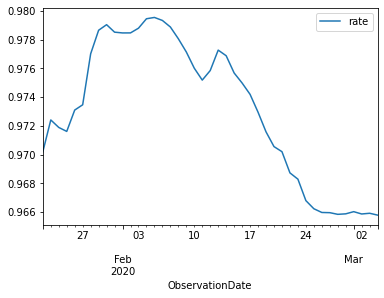

In [32]:
sr.plot()

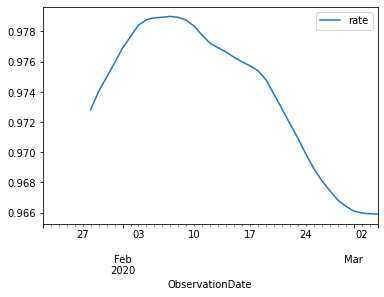

In [33]:
sr.rolling(window=7).mean().plot()

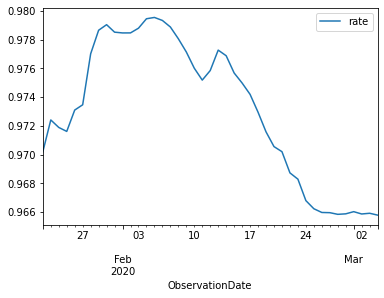

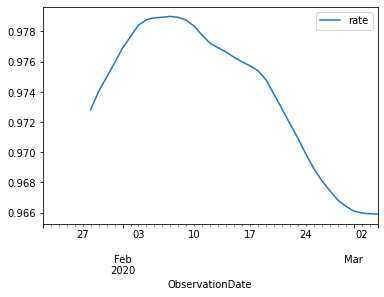

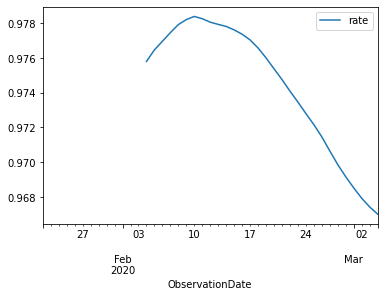

In [70]:
sr.plot()
sr.rolling(window=7).mean().plot()
sr.rolling(window=7).mean().plot()

Text(0.5, 1.0, 'Promedio móvil de Tasa de Supervivencia')

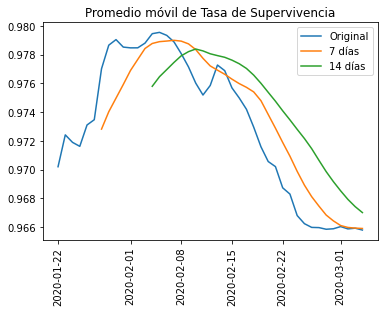

In [35]:
import matplotlib.pyplot as plt

plt.plot(sr, label = 'Original')
plt.plot(sr.rolling(window = 7).mean(), label = '7 días')
plt.plot(sr.rolling(window = 14).mean(), label = '14 días')
plt.xticks(rotation = '90')
plt.legend()
plt.title('Promedio móvil de Tasa de Supervivencia')

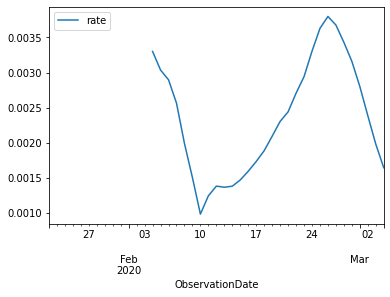

In [36]:
sr.rolling(window=14).apply(lambda x: np.std(x)).plot()

### Visualización y graficación de datos

In [37]:
# Cual es el pais donde existen mas casos
df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False)

Country/Region
Mainland China    67332.0
South Korea        5621.0
Italy              3089.0
Iran               2922.0
Others              706.0
                   ...   
Ivory Coast           1.0
Poland                1.0
Nigeria               1.0
Faroe Islands         1.0
Colombia              0.0
Name: Confirmed, Length: 90, dtype: float64

In [44]:
df_time = df.groupby(['Country/Region', pd.Grouper(key='ObservationDate', freq='1D')]).sum()
df_time

Confirmed  Deaths  Recovered
Country/Region ObservationDate                              
 Azerbaijan    2020-02-28             1.0     0.0        0.0
Afghanistan    2020-02-24             1.0     0.0        0.0
               2020-02-25             1.0     0.0        0.0
               2020-02-26             1.0     0.0        0.0
               2020-02-27             1.0     0.0        0.0
...                                   ...     ...        ...
Vietnam        2020-02-29            16.0     0.0       16.0
               2020-03-01            16.0     0.0       16.0
               2020-03-02            16.0     0.0       16.0
               2020-03-03            16.0     0.0       16.0
               2020-03-04            16.0     0.0       16.0

[1462 rows x 3 columns]

In [80]:
df_china = df_time.loc['Mainland China']
df_china.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-02-29,79251.0,2835.0,39279.0
2020-03-01,79826.0,2870.0,42118.0
2020-03-02,80026.0,2912.0,44810.0
2020-03-03,80151.0,2945.0,47404.0
2020-03-04,80271.0,2981.0,49955.0


In [48]:
import matplotlib.pyplot as plt


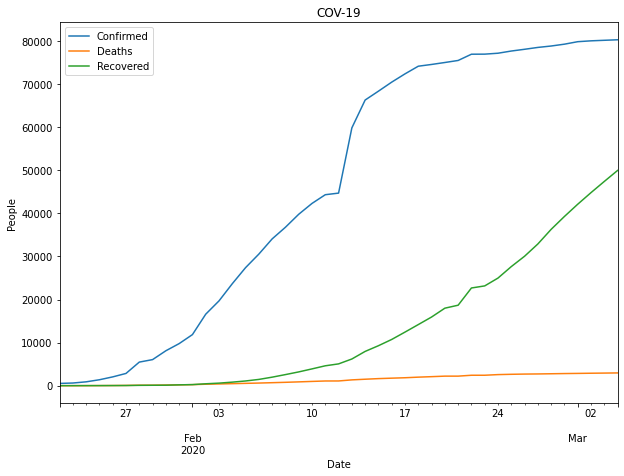

In [51]:
df_china.plot(figsize = (10, 7), title = 'COV-19')
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

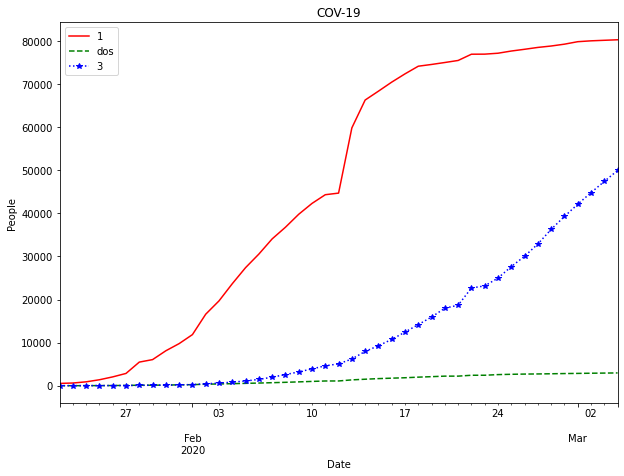

In [54]:
df_china.plot(figsize = (10, 7), title = 'COV-19',
              legend= False,
              style = ['r-', 'g--', 'b:*'])
plt.legend(['1','dos', '3'])
plt.xlabel('Date')
plt.ylabel('People')
plt.show()

In [56]:
df_monthly = df_china.resample('M').max()
df_monthly

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,9783.0,213.0,214.0
2020-02-29,79251.0,2835.0,39279.0
2020-03-31,80271.0,2981.0,49955.0


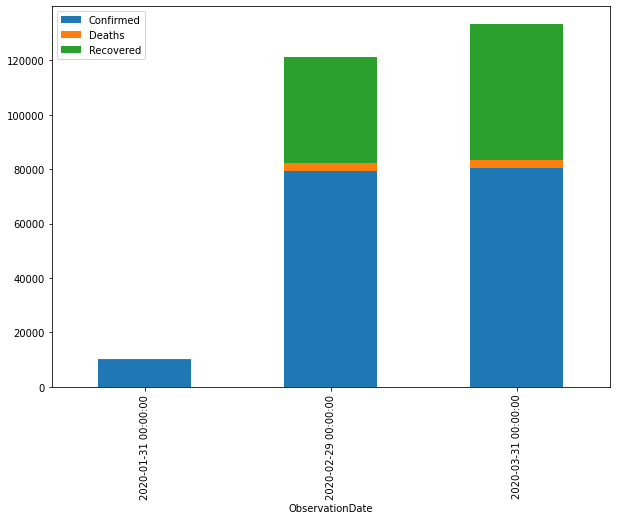

In [60]:
df_monthly.plot(figsize = (10,7), kind='bar', stacked=True)

In [62]:
df_monthly['Traitment'] = df_monthly['Confirmed'] - df_monthly['Deaths'] - df_monthly['Recovered']
df_monthly

,Confirmed,Deaths,Recovered,Traitment
ObservationDate,,,,
2020-01-31,9783.0,213.0,214.0,9356.0
2020-02-29,79251.0,2835.0,39279.0,37137.0
2020-03-31,80271.0,2981.0,49955.0,27335.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe279055668>,
      dtype=object)

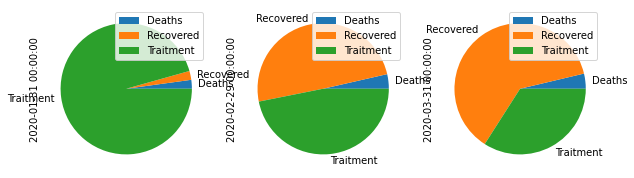

In [63]:
df_monthly[['Deaths', 'Recovered','Traitment']].T.plot(figsize= (10,7), kind='pie', subplots=True)

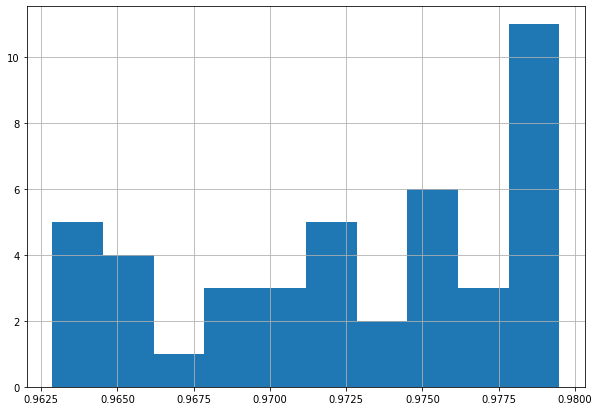

In [67]:
df_china['rate'] = 1 - df_china['Deaths']/df_china['Confirmed']
df_china['rate'].hist(figsize = (10,7), bins=10)

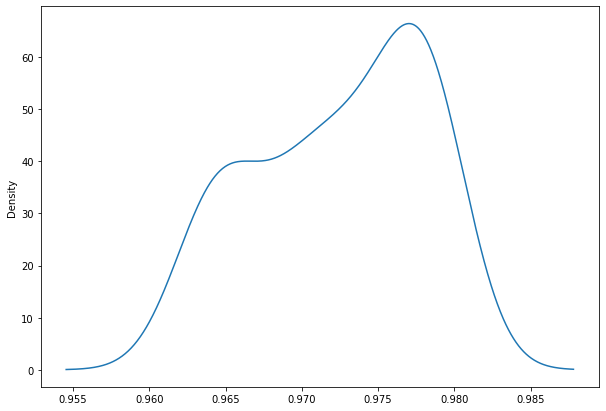

In [69]:
df_china['rate'].plot(figsize = (10,7), kind='kde')